## Markov Chain Monte Carlo 

In [4]:
import random 
import matplotlib.pyplot as plt 
import numpy as np 


In [16]:
def mean(x):
    somma = 0 
    for i in range(len(x)):
        somma+= x[i]
    x_mean = somma/len(x)
    return x_mean

def variance_estimation(x,x_mean):
    somma = 0 
    for i in range(len(x)):
        somma+= (x[i] - x_mean)**2
    var = (1/(len(x)-1))*somma
    return var

In [2]:
def montecarlo(N, stepsize,L,x,y):
    pos_x = []
    pos_y = []
    s = []
    square_out = 0 
    pos_x.append(x)
    pos_y.append(y)
    y = 0 
    for i in range(1,N+1):     
        if (np.sqrt(x**2 + y**2) <= 1):
            s.append(4)
            
        else:
            s.append(0)
        x += random.uniform(-stepsize,stepsize)
        y += random.uniform(-stepsize,stepsize)
          
        if(abs(x) < 1 and abs(y) < 1):
            pos_x.append(x)
            pos_y.append(y)
    
        else: 
            
            pos_x.append(pos_x[i-1])
            pos_y.append(pos_y[i-1])
            square_out+= 1
            x = pos_x[i-1]
            y = pos_y[i-1]
        
    acc_rate = (N-square_out)/N 
            
    return pos_x, pos_y, s,acc_rate

## 1)  
As one can see from the scatter plot below, the Acceptance Probabilities are very close to one with this stepsize: this is because the 'walker' visits mostly the region inside the circle and the high Acceptance Probability reflect this fact. 
One can also notice that as the number iterations increase, the Acceptance Ratio diminuish as the walker explores the region outside the square 

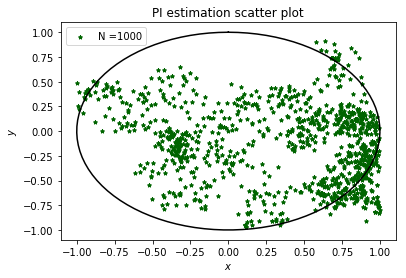

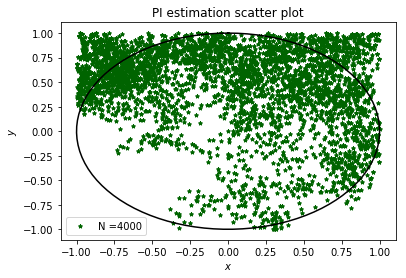

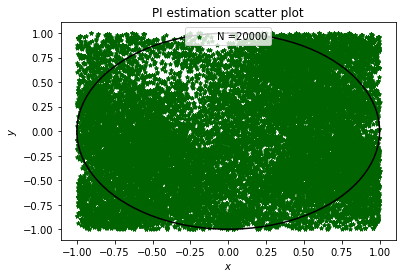

Stepsize =  0.1
Acceptance Probability for 1000, 4000, 20000 iterations are respectively [0.968, 0.944, 0.95745]
The estimated values of PI for 1000, 4000, 20000 iterations are respectively [3.448, 3.017, 3.2196]


In [4]:
stepsize = 0.1
acc_rates = []
pi_est = []
p_circles = []
x = []
y = []
s = []
for N in 1000,4000,20000:
    [x,y,s,acc_rate] = montecarlo(N,stepsize,1,0,0)
    acc_rates.append(acc_rate)
    pi_estimate = mean(s)
    pi_est.append(pi_estimate)
    plt.title('PI estimation scatter plot')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    a = plt.scatter(x,y,label = 'N ='+str(N),c='darkgreen',s = 15, marker ='*')
    t = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.sin(t), np.cos(t), color = 'black')
    plt.legend()
    plt.show()
print('Stepsize = ',stepsize)
print('Acceptance Probability for 1000, 4000, 20000 iterations are respectively', acc_rates)
print('The estimated values of PI for 1000, 4000, 20000 iterations are respectively',pi_est)

## 2) 
Following that the Acceptance Ratio should be 1/2, the optimal stepsize is 1.2. In this way the 'walker' visits equally likely the region inside and outside the square. 

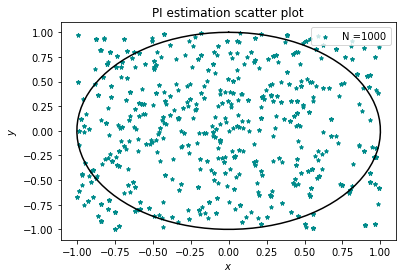

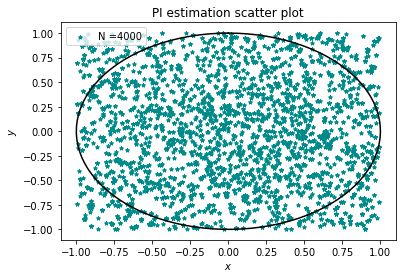

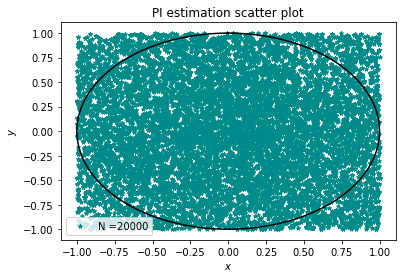

Stepsize =  1.2
Acceptance Probability for 1000, 4000, 20000 iterations are respectively [0.445, 0.49275, 0.489]
The estimated values of PI for 1000, 4000, 20000 iterations are respectively [2.884, 3.114, 3.1368]


In [5]:
stepsize = 1.2
acc_rates = []
pi_est = []
p_circles = []
x = []
y = []
s = []
for N in 1000,4000,20000:
    [x,y,s,acc_rate] = montecarlo(N,stepsize,1,0,0)
    acc_rates.append(acc_rate)
    pi_estimate = mean(s)
    pi_est.append(pi_estimate)
    plt.title('PI estimation scatter plot')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    a = plt.scatter(x,y,label = 'N ='+str(N),c='darkcyan',s = 15, marker ='*')
    t = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.sin(t), np.cos(t), color = 'black')
    plt.legend()
    plt.show()
print('Stepsize = ',stepsize)
print('Acceptance Probability for 1000, 4000, 20000 iterations are respectively', acc_rates)
print('The estimated values of PI for 1000, 4000, 20000 iterations are respectively',pi_est)

## 3) 
In this section we compared the theoretical error and the MCMC error for different stepsizes and different values of N, iterations. As expected the theoretical error decays proportionally to $N^{-\frac{1}{2}}$. 
The MCMC error decays at the sama way increasing N, but it deviates from the theoretical if the stepsize is not optimal: in fact, with the optimal stepsize = 1.2, there is a good agreement between the two plots. 

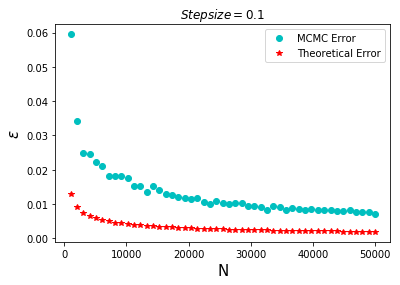

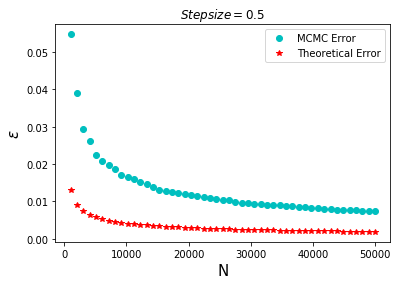

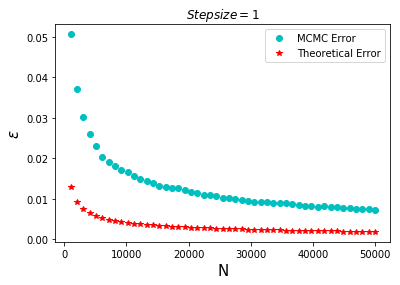

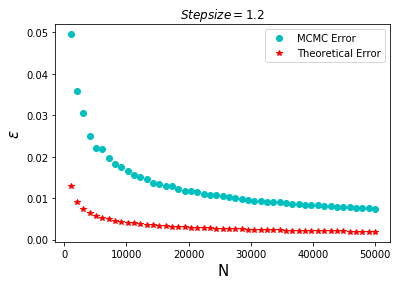

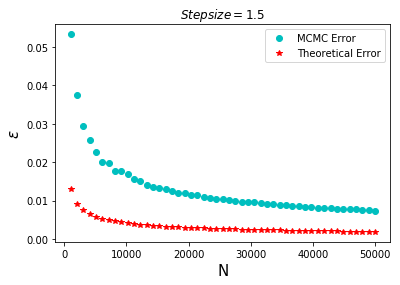

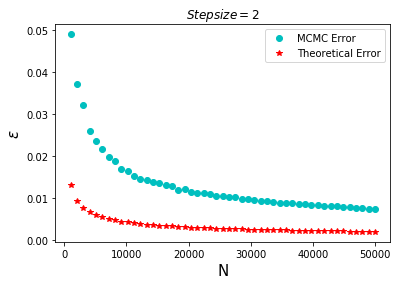

In [19]:
for stepsize in 0.1,0.5,1,1.2,1.5,2:
    x = []
    y = []
    s = []
    true_err = np.zeros(49) 
    err = np.zeros(49)
    i = 0 
    Ns = np.linspace(1000,50000,49)
    for N in range(1000,50000,1000):
        [x,y,s,acc_rate] = montecarlo(N,stepsize,1,0,0)
        #Mean estimation of pi 
        pi_mean = mean(s)
        var_est = variance_estimation(s,pi_mean)
        true_err[i] = (np.sqrt( (4*np.pi - (np.pi)**2)/N))/4
        errore = np.sqrt(var_est/N)
        #Estimation of variance for every k 
        err[i] = errore
        i+=1
    plt.title('$Stepsize = $'+str(stepsize))
    plt.ylabel('$\epsilon$',fontsize = 15)
    plt.xlabel('N',fontsize = 15)
    plt.plot(Ns,err,'co',label='MCMC Error')
    plt.plot(Ns,true_err,'r*',label = 'Theoretical Error')
    plt.legend()
    plt.show()

## Bunching Method 

In [83]:
def bunching(old_v):
    len_old_v = len(old_v)
    data      = []
    
    for i in range(int(len(old_v)/2)-1):
        data.append(old_v) 
        new_v = np.zeros(int(len_old_v/2))
        flag = True
        k = 0
        l = 0 
        if(len_old_v == 1):
            break
        print(len_old_v)
        while(flag == True):
            new_v[l] = (old_v[k]+old_v[k+1])/2
            k+= 2
            l+= 1
            
            if(k >= len_old_v):
                flag = False 
        len_old_v = int(len(new_v))
        old_v = new_v 
    return data

In [97]:
N        = 2**25
stepsize = 0.1
[x,y,s,acc_rate] =montecarlo(N,stepsize,1,0,0)
data     = []
data     = bunching(s)

33554432
16777216
8388608
4194304
2097152
1048576
524288
262144
131072
65536
32768
16384
8192
4096
2048
1024
512
256
128
64
32
16
8
4
2


In [99]:
stepsize = 1.2
[x,y,s1,acc_rate] = montecarlo(N,stepsize,1,0,0)
data1    = []
data1    = bunching(s1) 

33554432
16777216
8388608
4194304
2097152
1048576
524288
262144
131072
65536
32768
16384
8192
4096
2048
1024
512
256
128
64
32
16
8
4
2


In [100]:
pi   = np.zeros(len(data))
var  = np.zeros(len(data))
err  = np.zeros(len(data))
pi1  = np.zeros(len(data1))
var1 = np.zeros(len(data1))
err1 = np.zeros(len(data1))

for i in range(len(data)):
    pi[i]  = mean(data[i])
    var[i] = variance_estimation(data[i],pi[i])
    err[i]  = np.sqrt(var[i]/len(data[i]))
for i in range(len(data1)):
    pi1[i]  = mean(data1[i])
    var1[i] = variance_estimation(data1[i],pi1[i])
    err1[i] = np.sqrt(var1[i]/len(data1[i]))


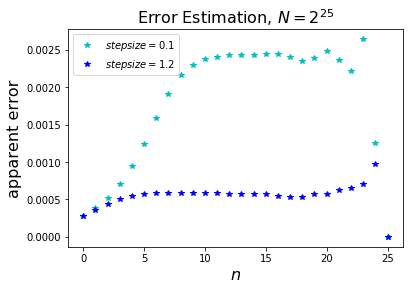

Theoretical Error 0.0002834958484565714
Estimated error through bunching procedure 0.0005860732786540486


In [109]:
n  = np.linspace(0,len(data)-1,len(data))
n1 = np.linspace(0,len(data1)-1,len(data1))
plt.title('Error Estimation, $N=2^{25}$',fontsize=16)
plt.ylabel('apparent error',fontsize=16)
plt.xlabel('$n$',fontsize=16)
plt.plot(n,err,'c*',label='$stepsize = 0.1$')
plt.plot(n1,err1,'b*',label='$stepsize = 1.2$')
plt.legend()
plt.show()
print('Theoretical Error',np.sqrt(((4*np.pi - np.pi**2)/N)))
print('Estimated error through bunching procedure',err1[10])